In [1]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction 
#   - backward pass: gradients
#   - update weights

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

# Steps
# 0) Prepare data
# 1) model
# 2) loss and optimizer
# 3) training loop

In [5]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features = 1, noise=20, random_state=1)

len(X_numpy), len(y_numpy)

(100, 100)

In [12]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y, y.shape

(tensor([-5.5539e+01, -1.0662e+01,  2.2757e+01,  1.0110e+02,  1.4434e+02,
          3.3289e+01,  3.3015e+01, -2.5887e+01, -9.9639e+01,  2.3803e+01,
         -4.5589e+01, -8.3388e+00, -9.5315e+01,  3.6407e+01, -8.7293e+01,
          6.7669e+01, -1.3687e+01, -5.5441e+01, -6.5340e+01, -5.4450e+01,
         -2.8835e+01,  1.7884e+02,  6.5084e+01,  2.6668e+01, -1.8546e+01,
         -4.1499e+01,  8.5583e-01,  4.4562e+01,  1.1598e+02, -6.4620e+01,
         -2.5931e+01, -6.0882e+01,  1.8720e+01,  7.5070e+01,  1.1720e+02,
         -2.2698e+01, -5.6363e+01,  1.8084e+02, -1.9257e+02,  6.8503e+01,
          1.6552e+02,  1.0500e+02, -7.0434e+01, -5.8769e+01, -4.1576e+01,
          7.3247e+01,  4.0966e+01,  8.0462e+01, -2.8794e+01,  3.4234e+01,
         -4.1715e+01,  1.4355e+01,  7.9336e+01,  2.7129e+01, -3.9487e+01,
          6.6805e+01,  9.5531e+01,  3.5610e+00,  1.0857e-01,  5.6495e+01,
          5.1575e+01, -2.0974e+00, -2.6656e+01,  3.9742e+01,  3.6101e+01,
         -7.5602e+01,  1.9713e+01, -7.

In [15]:
y = y.view(y.shape[0], 1)

In [16]:
X.shape

torch.Size([100, 1])

In [17]:
n_samples, n_features = X.shape

In [18]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [19]:
# 2) Loss and Optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch: 10 , loss = 4454.1440
epoch: 20 , loss = 3322.8494
epoch: 30 , loss = 2503.9473
epoch: 40 , loss = 1910.5601
epoch: 50 , loss = 1480.1713
epoch: 60 , loss = 1167.7310
epoch: 70 , loss = 940.7294
epoch: 80 , loss = 775.6789
epoch: 90 , loss = 655.5893
epoch: 100 , loss = 568.1571


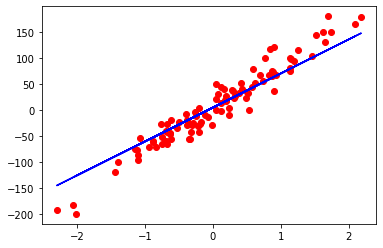

In [20]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    #empty gradient
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} , loss = {loss.item():.4f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted,'b' )
plt.show()